# 1) The task is fetch current 10 stocks which have gained highest and lost highest 


In [18]:
# Q1) 
nse="https://www.nseindia.com/market-data/top-gainers-loosers"
from nsetools import Nse
from pprint import pprint
nse=Nse()
Gainers=nse.get_top_gainers()
Loosers=nse.get_top_fno_losers()
gainers=[]
loosers=[]
for i in range(10):
    gain=Gainers[i]['symbol']
    gainers.append(gain)
    loose=Loosers[i]['symbol']
    loosers.append(loose)
print('Top 10 Gainers are: ')
print(gainers)
print('-'*110)
print('Top 10 Loosers are: ')
print(loosers)

Top 10 Gainers are: 
['M&M', 'COALINDIA', 'BAJAJFINSV', 'NTPC', 'HINDALCO', 'HDFCBANK', 'AXISBANK', 'LT', 'INDUSINDBK', 'DRREDDY']
--------------------------------------------------------------------------------------------------------------
Top 10 Loosers are: 
['HINDPETRO', 'ALKEM', 'MFSL', 'BPCL', 'ICICIPRULI', 'PETRONET', 'SBICARD', 'SBIN', 'INDIAMART', 'GLENMARK']


# 3) Showing  and analyse them with trend

## Analysis of top 10 Gainer Stocks

[*********************100%***********************]  1 of 1 completed


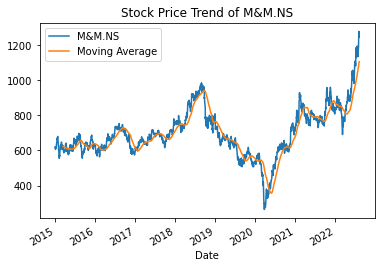

[*********************100%***********************]  1 of 1 completed


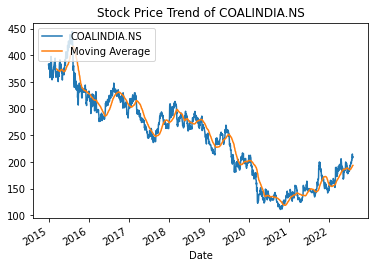

[*********************100%***********************]  1 of 1 completed


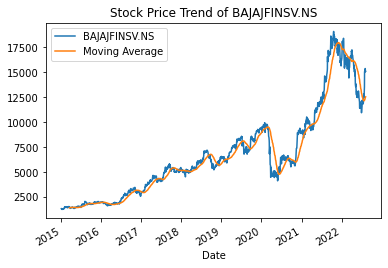

[*********************100%***********************]  1 of 1 completed


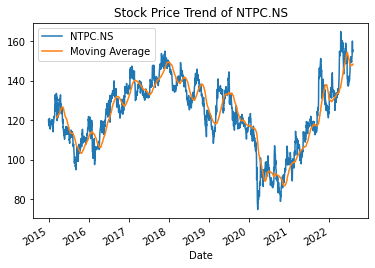

[*********************100%***********************]  1 of 1 completed


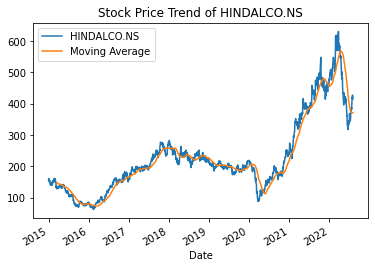

[*********************100%***********************]  1 of 1 completed


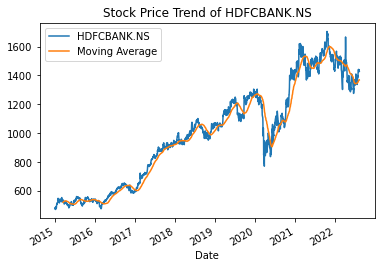

[*********************100%***********************]  1 of 1 completed


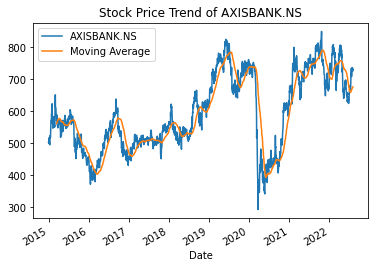

[*********************100%***********************]  1 of 1 completed


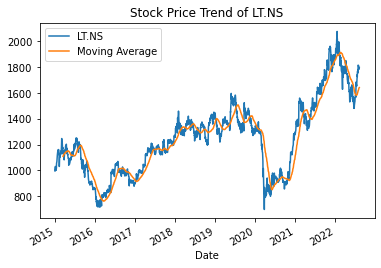

[*********************100%***********************]  1 of 1 completed


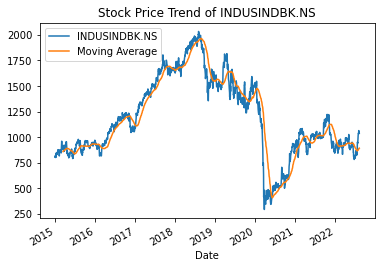

[*********************100%***********************]  1 of 1 completed


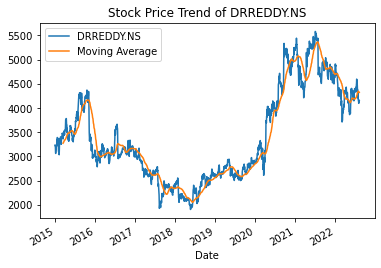

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
start = "2015-01-01"
#end = '2022-1-01'
end=datetime.today().strftime('%Y-%m-%d')

for st in gainers:
    st=st+'.NS'
    s=yf.download(st,start,end)
    #print(st)
    #st.plot()
    s['Open'].plot(label=st)
    s['MA50'] = s['Open'].rolling(50).mean()
    s['MA50'].plot(label='Moving Average')
    plt.legend(loc="upper left")
    plt.title('Stock Price Trend of {}'.format(st))
    plt.show()

## Analysis of top 10 Looser Stocks

[*********************100%***********************]  1 of 1 completed


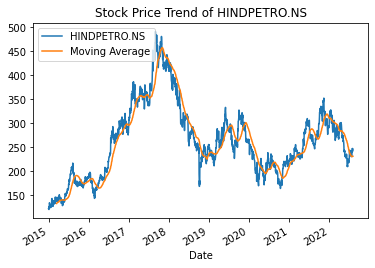

[*********************100%***********************]  1 of 1 completed


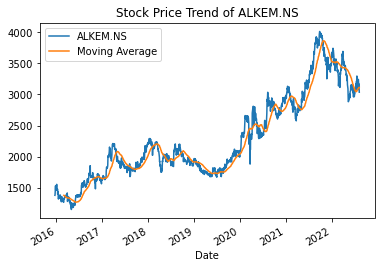

[*********************100%***********************]  1 of 1 completed


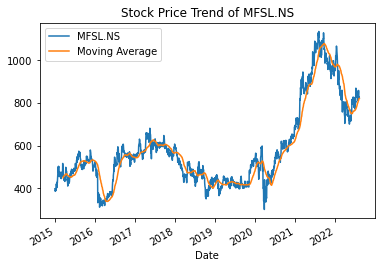

[*********************100%***********************]  1 of 1 completed


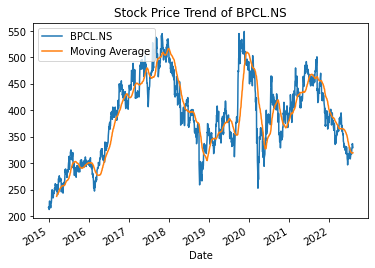

[*********************100%***********************]  1 of 1 completed


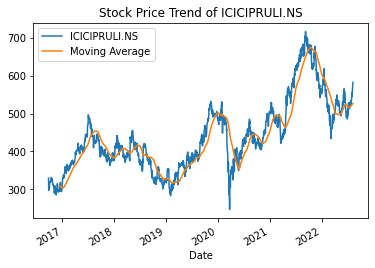

[*********************100%***********************]  1 of 1 completed


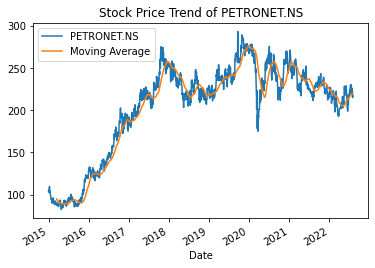

[*********************100%***********************]  1 of 1 completed


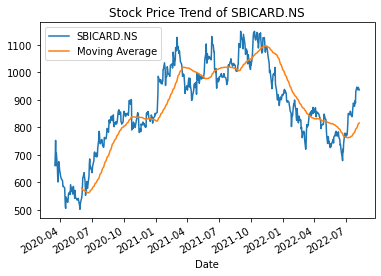

[*********************100%***********************]  1 of 1 completed


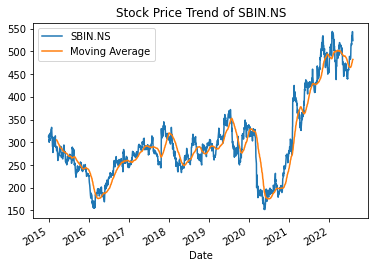

[*********************100%***********************]  1 of 1 completed


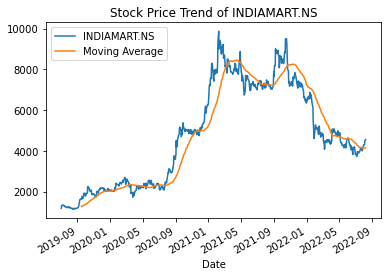

[*********************100%***********************]  1 of 1 completed


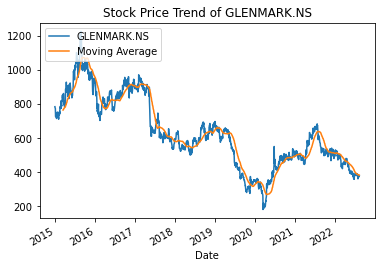

In [22]:
# Q2) Loosers
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
start = "2015-01-01"
#end = '2022-1-01'
end=datetime.today().strftime('%Y-%m-%d')

for st in loosers:
    st=st+'.NS'
    s=yf.download(st,start,end)
    #print(st)
    #st.plot()
    s['Open'].plot(label=st)
    s['MA50'] = s['Open'].rolling(50).mean()
    s['MA50'].plot(label='Moving Average')
    plt.legend(loc="upper left")
    plt.title('Stock Price Trend of {}'.format(st))
    plt.show()

# 2) Then get the buzz or sentiment around these stocks ( companies) from social media


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon')
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10

company_name = input("Please provide the name of the Company or a Ticker: ")
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    df = pd.DataFrame(result)
    print(df)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Please provide the name of the Company or a Ticker: coal india
Searching for and analyzing coal india, Please be patient, it might take a while...
                                               title  \
0  Nifty closes above 17500; Mahindra and Mahindr...   

                             media       date                   datetime  \
0  Dalal Street Investment Journal  1 day ago 2022-08-08 19:11:03.179756   

                   desc                                               link  \
0  M&M, Coal India &...  https://www.dsij.in/dsijarticledetail/nifty-cl...   

                                                 img  
0  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...  
